# IMEC2201 Herramientas Computacionales 
## Semana 1: Introducción
### Clase 1: Configuración Espacio de Trabajo

Universidad de los Andes — Marzo 28, 2022.

---

## TABLA DE CONTENIDO

### Sección 1: Verificación Instalación Julia [→](#section1)
- 1.1. Primer Código
- 1.2. Un Poco Más Allá

### Sección 2: Vistazo a la Clase 2 [→](#section2)
- 2.1. Filtro Datos Hormiga de Irradiancia

___

<a id="section1"></a>
# Sección 1: Verificación Instalación Julia

## 1.1. Primer Código

In [7]:
println("Hello World!")

Hello World!


## 1.2. Un Poco Más Allá

In [8]:
#= 
Definimos la función 'greet_to_IMEC2001' que
pregunta por un nombre y devuelve un saludo
con la bienvenida al curso
=#

function greet_to_IMEC2001()
    print("¿Cuál es tu nombre?: ")
    name = readline()
    println("\nHola, $name. ¡Bienvenido/a al curso IMEC2001!")
end

greet_to_IMEC2001()

stdin> Nelson
¿Cuál es tu nombre?: 
Hola, Nelson. ¡Bienvenido/a al curso IMEC2001!


# Sección 2: Vistazo a la Clase 2

**¡Importante!** Note que la carpeta `week1` contiene dos archivos: `Project.toml` y `Manifest.toml`. Estos configuran el <font color="#FF5733">*ambiente de trabajo*</font> y facilitan el manejo de <font color="#FF5733">librerías</font>.

Para inicializar el ambiente desde el terminal, ejecute lo siguiente:

```shell
$ (v1.7) pkg > activate .
$ (week1) pkg> instantiate
```

**Nota:** Para acceder al Pkg REPL, escriba el corchete derecho `]` en el Julia REPL. Note que el REPL cambie de color de verde (Julia REPL) a azul (Pkg REPL). Una vez ejecutado el código `activate .`, el prefijo entre paréntesis que indica el ambiente activo, cambia de `v1.7`a `week1`.

O, desde Jupyter Notebook, ejecute:

```julia
$ using Pkg
$ Pkg.activate()
$ Pkg.instantiate()
```

**Nota:** La activación del ambiente <font color="#FF5733">*precompila*</font> las librerías por lo que puede tardar un momento su ejecución completa.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de la librería [`Pkg.jl`](https://pkgdocs.julialang.org/v1/environments/) y en el documento dando clic [aquí](https://towardsdatascience.com/how-to-setup-project-environments-in-julia-ec8ae73afe9c).
</div>

In [5]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()

  Activating project at `~/Documents/GitHub/ua-imec2001-hc-202210/content/week1`


In [6]:
Pkg.status()

      Status `~/Documents/GitHub/ua-imec2001-hc-202210/content/week1/Project.toml`
  [91a5bcdd] Plots v1.27.3


## 2.1. Ayuda en Funciones

In [9]:
? println

search: println printstyled print sprint isprint



```
println([io::IO], xs...)
```

Print (using [`print`](@ref)) `xs` followed by a newline. If `io` is not supplied, prints to [`stdout`](@ref).

See also [`printstyled`](@ref) to add colors etc.

# Examples

```jldoctest
julia> println("Hello, world")
Hello, world

julia> io = IOBuffer();

julia> println(io, "Hello", ',', " world.")

julia> String(take!(io))
"Hello, world.\n"
```


## 2.2. Arreglos y Matrices

In [21]:
#=
Note las tres formas diferentes de presentar la información 
en la función 'println': 
    1. "$a"
    2. ", ndims(a)"
    3. "$(length(a))"
=#

a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # Array

println("a = $a")
println("La cantidad de filas es: ", ndims(a))
println("La cantidad de elementos es $(length(a))")

a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
La cantidad de filas es: 1
La cantidad de elementos es 10


In [22]:
#=
También se puede generar con 'collect(start:step:stop)'
=#
a = collect(1:1:10)

println("a = $a")
println("La cantidad de filas es: ", ndims(a))
println("La cantidad de elementos es $(length(a))")

a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
La cantidad de filas es: 1
La cantidad de elementos es 10


In [23]:
#=
También podemos 'combinar' las dos expresiones previas
=#

a = [1:1:10 ...] # start:step:stop

println("a = $a")
println("La cantidad de filas es: ", ndims(a))
println("La cantidad de elementos es $(length(a))")

a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
La cantidad de filas es: 1
La cantidad de elementos es 10


In [27]:
#=
Las matrices siguen la siguiente sintaxis
=#
b = [[1,2,3] [4,5,6] [7,8,9]]

println("b = $b")
println("La cantidad de filas es: ", ndims(b))
println("La cantidad de elementos es $(length(b))")

La cantidad de filas es: 2
La cantidad de elementos es 9


In [28]:
#=
Si chequeamos 'b' únicamente...
=#

b

3×3 Matrix{Int64}:
 1  4  7
 2  5  8
 3  6  9

In [29]:
#=
O directamente el tipo con 'typeof()'
=#

typeof(b)

Matrix{Int64} (alias for Array{Int64, 2})

## 2.3. Funciones

In [ ]:
#= 
Promedio de tres números ingresados por el usuario
=#

function average3()
    print("First number: ")
    num1 = parse(Float64, readline())

    print("Second number: ")
    num2 = parse(Float64, readline())

    print("Third number: ")
    num3 = parse(Float64, readline())

    avg = round((num1+num2+num3)/3, digits=2)
    println("\nThe average of $num1, $num2 and $num3 is $avg.")
end

average3()

# 2.5. Gráficas
Julia dispone de diferentes librerías para visualizar información ([aquí](https://juliapackages.com/c/graphics)). En este caso, usaremos `Plots.jl`.

In [2]:
using Pkg
Pkg.add("XLSX")
Pkg.add("CSV")
Pkg.add("DataFrames")

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed ZipFile ─ v0.9.4
   Installed EzXML ─── v1.1.0
   Installed XLSX ──── v0.7.9
    Updating `~/Documents/GitHub/ua-imec2001-hc-202210/content/week1/Project.toml`
  [fdbf4ff8] + XLSX v0.7.9
    Updating `~/Documents/GitHub/ua-imec2001-hc-202210/content/week1/Manifest.toml`
  [8f5d6c58] + EzXML v1.1.0
  [fdbf4ff8] + XLSX v0.7.9
  [a5390f91] + ZipFile v0.9.4
Precompiling project...
  ✓ ZipFile
  ✓ EzXML
  ✓ XLSX
  3 dependencies successfully precompiled in 5 seconds (128 already precompiled)
   Resolving package versions...
   Installed InlineStrings ────── v1.1.2
   Installed WeakRefStrings ───── v1.4.2
   Installed SentinelArrays ───── v1.3.12
   Installed CodecZlib ────────── v0.7.0
   Installed PooledArrays ─────── v1.4.1
   Installed FilePathsBase ────── v0.9.18
   Installed TranscodingStreams ─ v0.9.6
   Installed C

In [3]:
Pkg.status()

      Status `~/Documents/GitHub/ua-imec2001-hc-202210/content/week1/Project.toml`
  [336ed68f] CSV v0.10.3
  [a93c6f00] DataFrames v1.3.2
  [91a5bcdd] Plots v1.27.3
  [fdbf4ff8] XLSX v0.7.9


In [83]:
using DataFrames, XLSX
df1 = DataFrame(XLSX.readtable("./data/hc-users.xlsx", "Users")...)

println("El DataFrame tiene $(size(df1)[1]) filas y $(size(df1)[2]) columnas.")

first(df1, 5)

El DataFrame tiene 17 filas y 5 columnas.


,OrgDefinedId,Username,Last Name,First Name,Email
,Any,Any,Any,Any,Any
1,201017845,da.quintero3014,Quintero Vasquez,Diego Armando,da.quintero3014@uniandes.edu.co
2,201713878,ls.montenegro,Montenegro Gualteros,Luis Santiago,ls.montenegro@uniandes.edu.co
3,201814530,jf.ortizm,Ortiz Monzon,Juan Felipe,jf.ortizm@uniandes.edu.co
4,201815222,jd.sabogal,Sabogal Serrato,Juan David,jd.sabogal@uniandes.edu.co
5,201821670,ja.parraga,Parraga Ariza,Jorge Alejandro,ja.parraga@uniandes.edu.co


Es posible trabajar con esta información para obtener métricas descriptivas interesantes. Por ejemplo, podemos analizar en qué
año ingresaron a la Universidad los estudiantes del curso (asumiendo que esta información la da los cuatro primeros dígitos del código, es decir, de la columna `OrgDefinedId`).

In [84]:
# 1. Lista para almacenar los cuatro primeros dígitos del código (i.e., año)
id_year = []

# 2. Iteración para extraer el año del código y almacenarlo en la lista 'id_year'
for i in df1.OrgDefinedId
    push!(id_year, parse(Int64, i[1:4]))
end

println(id_year[1:5])
println("") # Línea en blanco para mejor visualización

# 3. Agregar esta información en el DataFrame 'df1'
df1[!, :Year] = id_year
show(df1[1:5, [:Username, :Year]])

# 4. Análisis del año
describe(df1, cols=:Year)

Any[2010, 2017, 2018, 2018, 2018]

5×2 DataFrame
 Row │ Username         Year 
     │ Any              Any  
─────┼───────────────────────
   1 │ da.quintero3014  2010
   2 │ ls.montenegro    2017
   3 │ jf.ortizm        2018
   4 │ jd.sabogal       2018
   5 │ ja.parraga       2018

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,Year,2018.82,2010,2019.0,2021,0,Any


Para el caso de datos tabulares en formato CSV, usamos la correspondiente librería (i.e., `CSV`).

In [81]:
using CSV

file = CSV.File("./data/hc-users.csv", header=1, delim=';')
df2 = DataFrame(file)

first(df2, 5)



,OrgDefinedId,Username,Last Name,First Name,Email
,Int64,String15,String31,String15,String31
1,201017845,da.quintero3014,Quintero Vasquez,Diego Armando,da.quintero3014@uniandes.edu.co
2,201713878,ls.montenegro,Montenegro Gualteros,Luis Santiago,ls.montenegro@uniandes.edu.co
3,201814530,jf.ortizm,Ortiz Monzon,Juan Felipe,jf.ortizm@uniandes.edu.co
4,201815222,jd.sabogal,Sabogal Serrato,Juan David,jd.sabogal@uniandes.edu.co
5,201821670,ja.parraga,Parraga Ariza,Jorge Alejandro,ja.parraga@uniandes.edu.co


## 2.4. Gráficas

Julia dispone de diversas librerías para generar visualizaciones ([aquí](https://juliapackages.com/c/graphics)). En este caso, usaremos `Plots.jl`.

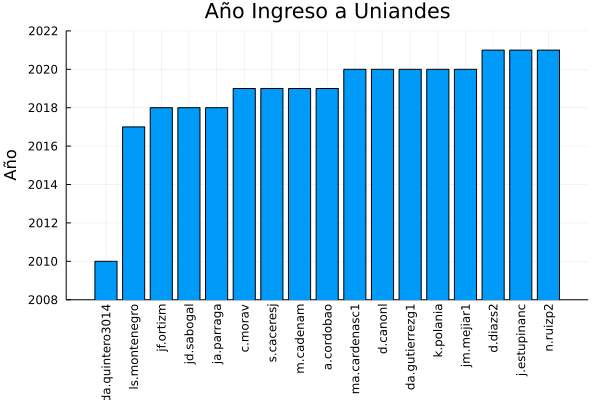

In [112]:
using Plots

plot(df1.Username, df1.Year,
     seriestype = :bar, 
     title="Año Ingreso a Uniandes", 
     xlabel="Usuario", 
     ylabel="Año",
     xrotation=90,
     ylims = (2008,2022),
     legend=false,
     xticks=(0.5:17, df1.Username))
